# Topic:Credit Fraud Investigation
# Name:
# Date:
# Course: 
# Tyepe of machine learning used:Random Forest classifier 

## Overal Description of the Code 
The code below demonstrates an ML solution incorporating a Random Forest classifier to identify credit card fraud. It starts with the importing and preprocessing of the dataset, which is converted from ARFF to CSV format for simplicity. The code then preprocesses the data by normalizing, transforming, and encoding it in the dataset to prepare it for analysis. Exploratory Data Analysis (EDA) is performed on data. To analyze the data more visually, the count plots, box plots, and pie charts are used to determine the distribution of the features and the target variable.
First, the given data is preprocessed, and then the data is divided into train and test datasets. The Random Forest classification model is trained to predict the transaction as either fraudulent or non-fraudulent. As a measure of accuracy, accuracy and confusion matrices and classification reports are used to check the model's performance. The code also inculcates model validation, where cross-validation enhances the script model.


## Step 1:Importing the necessary Library 
In this step, all the libraries needed to handle data and perform all the machine-learning computations are loaded. ARFF file is used to read files using the Scipy library. Data manipulation and operation on numerical values are done using Pandas and Numpy Libraries. train_test_split splits the dataset into the training set as well as the testing set. The categorical data is encoded using LabelEncoder, and the StandardScaler is applied to the given dataset to bring the data on a similar scale. The model is created using the RandomForestClassifier. Lastly, evaluation metrics are included in order to assess the accuracy of the model built.

In [7]:

#Import the module to load the ARFF files used in the machine learning datasets.
from scipy.io import arff 
# Import  data analysis tool known as Pandas to handle the data.
import pandas as pd  
# Numpy is used for floating point computations and for handling arrays.
import numpy as np 
# Import function to partition the dataset into train and test datasets.
from sklearn.model_selection import train_test_split  
# Import classes to encode categorical labels and scale features are imported below.
from sklearn.preprocessing import LabelEncoder, StandardScaler  
# To handle classification problems, import RandomForestClassifier, an ensemble method.
from sklearn.ensemble import RandomForestClassifier  
# Import functions to evaluate the performance of this model.
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 


## Step 2: Changing the file arff to csv 
This code reads an.arf file, which is used as a widespread data mining format and transformed into a CSV format. First, it will also load the—loadarff, which preserves the data and the corresponding information about them. The data is then converted into a Pandas data frame, which is easier to manipulate. Finally, we convert this dataframe to CSV format, better suited for data analysis, and show the location of the CSV file.ess messag

In [2]:
# Update the path with the actual location of your ARFF file.
arff_file_path = 'C:/Users/840 G3/Downloads/credit_fraud.arff'
# Load the data from the ARFF file and its attributes
data, meta = arff.loadarff(arff_file_path)
# Convert to pandas DataFrame
df = pd.DataFrame(data)
# Define the path of the CSV file to be generated.
csv_file_path = 'credit_fraud.csv'  
# Save the DataFrame as a CSV file, but do not include the index
df.to_csv(csv_file_path, index=False)
# Print a success message
print(f"ARFF file has been successfully converted to CSV and saved at: {csv_file_path}")

ARFF file has been successfully converted to CSV and saved at: credit_fraud.csv


## Step3:Loading and Reviewing of data
In this step, the required data set is imported from a CSV file ‘credit_fraud.csv’ with the help of Pandas data. The info() method is then invoked to describe the data structure, data types, number of samples, and any missing data to assess the data quality.ls


In [64]:
# Load the given dataset
data = pd.read_csv('credit_fraud.csv')
# View data types and nulls
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   over_draft              1000 non-null   object 
 1   credit_usage            1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   current_balance         1000 non-null   float64
 5   Average_Credit_Balance  1000 non-null   object 
 6   employment              1000 non-null   object 
 7   location                1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  cc_age                  1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [10]:
# Viewing of the first few rows
data.head() 

,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,other_parties,...,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,b'<0',6.0,b'critical/other existing credit',b'radio/tv',1169.0,b'no known savings',b'>=7',4.0,b'male single',b'none',...,b'real estate',67.0,b'none',b'own',2.0,b'skilled',1.0,b'yes',b'yes',b'good'
1,b'0<=X<200',48.0,b'existing paid',b'radio/tv',5951.0,b'<100',b'1<=X<4',2.0,b'female div/dep/mar',b'none',...,b'real estate',22.0,b'none',b'own',1.0,b'skilled',1.0,b'none',b'yes',b'bad'
2,b'no checking',12.0,b'critical/other existing credit',b'education',2096.0,b'<100',b'4<=X<7',2.0,b'male single',b'none',...,b'real estate',49.0,b'none',b'own',1.0,b'unskilled resident',2.0,b'none',b'yes',b'good'
3,b'<0',42.0,b'existing paid',b'furniture/equipment',7882.0,b'<100',b'4<=X<7',2.0,b'male single',b'guarantor',...,b'life insurance',45.0,b'none',b'for free',1.0,b'skilled',2.0,b'none',b'yes',b'good'
4,b'<0',24.0,b'delayed previously',b'new car',4870.0,b'<100',b'1<=X<4',3.0,b'male single',b'none',...,b'no known property',53.0,b'none',b'for free',2.0,b'skilled',2.0,b'none',b'yes',b'bad'


## Step 3 Data Cleaning 
In this part of the data cleaning process, missing value detection uses data.isnull().sum().  Subsequently, outliers in the numeric fields are controlled by using the 99th percentile of the values and converting negative values to the median value of that column. Similarly, if the columns are of categorical type, they are encoded into numeric type using LabelEncoder. Lastly, additional features such as ‘Average_Credit_Balance’, ‘over_draft’, and ‘employment’ are deleted from the data frame for further analysis and data modeling. This makes for a neater and less cluttered dataset in terms of the manageable quantity it will present.

In [11]:

# Remove unwanted characters (e.g., 'b' and apostrophes from the dataset)
data = data.replace({r"b'": '', r"'": ''}, regex=True)
# Print the first few rows after removing unwanted characters to verify
print("Data after removing unwanted characters:")
data.head()  # Display the first few rows of the cleaned data

Data after removing unwanted characters:


,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,other_parties,...,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [12]:
# Impute missing values
# Look for the presence of missing values.
print(data.isnull().sum())

over_draft                0
credit_usage              0
credit_history            0
purpose                   0
current_balance           0
Average_Credit_Balance    0
employment                0
location                  0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
cc_age                    0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64


In [13]:
# Handle incorrect/inconsistent values
# Identification of numerical variables (excluding ‘class’ if it is qualitative)
numeric_cols = data.select_dtypes(include=[np.number]).columns.difference(['class'])
# Scale all numerical features so that no values go above the 99th percentile; handle negatives
for col in numeric_cols:
    # Cap at 99th percentile
    data[col] = np.clip(data[col], None, data[col].quantile(0.99))
    # Use the median to replace negative values.
    data[col] = np.where(data[col] < 0, data[col].median(), data[col])


In [14]:

# Category values must be converted to numerical form using a label encoder 
# Initialize the LabelEncoder
le = LabelEncoder()
# List of categorical columns to be encoded
categorical_columns = ['over_draft', 'credit_history', 'purpose', 'Average_Credit_Balance', 
                       'employment', 'personal_status', 'other_parties', 'property_magnitude',
                       'other_payment_plans', 'housing', 'job', 'own_telephone', 
                       'foreign_worker', 'class']
# Iterate through each of the categorical columns
for col in categorical_columns:
    # It makes use of label encoding to encode name labels to integers.
    data[col] = le.fit_transform(data[col])


In [15]:
# Delete the columns that are not useful.
# Dropping ‘Average_Credit_Balance’, ‘over_draft’, and ‘employment’
data = data.drop(['Average_Credit_Balance', 'over_draft', 'employment'], axis=1)

## Step 4:Data Explorations in graphical View
In this step, different graphs are generated to analyze the data set that is being studied. A count plot is a type of plot used to display the count of the target variable; here, it is ‘class’. Using a box plot, we can disentangle the ‘property_magnitude’ by different classes, which shows if they are distributed differently. Further, a pie chart is used to divide data for each category in ‘credit_history’ to understand the distribution of credit history in instances. Such visualizations serve to reveal trends as well as associations between the variables in the dataset.
in a pie chart.












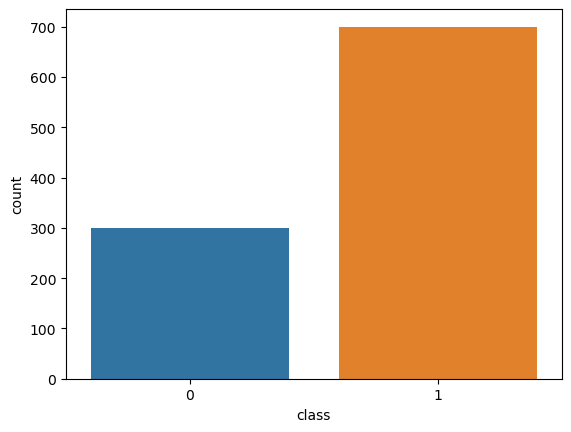

In [32]:

# Visualizing class distribution
sns.countplot(x='class', data=data)
# Display the plot    
plt.show()

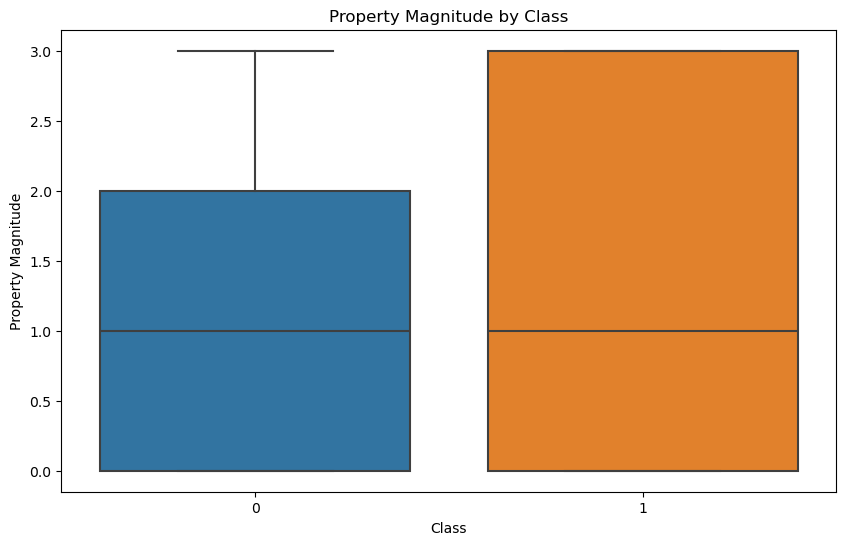

In [61]:
## Visualizing Magnitude by Class 
# Incorporate the figure's size by using the plot as the plot reference.
plt.figure(figsize=(10, 6))
# Add a box plot of ‘property_magnitude’ by ‘class’ to visualize the distribution of the variable.
sns.boxplot(x='class', y='property_magnitude', data=data)
# Plot title should be assigned to the following as a string value:
plt.title('Property Magnitude by Class')
# Add a legend to the x-axis and call it Class
plt.xlabel('Class')
# It is important to label the y-axis as Property Magnitude.
plt.ylabel('Property Magnitude')
# Display the plot
plt.show()


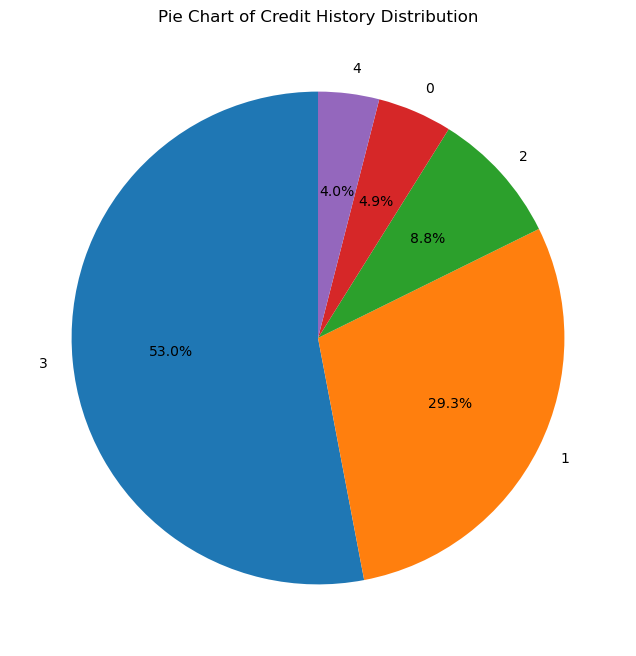

In [62]:

## Pie chart showing the distribution of credit history equipment
# Specify the size of the pie chart.
plt.figure(figsize=(8, 8))
## Plot the distribution of ‘credit history’ using a pie chart.
data['credit_history'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
# Identify the title of the pie chart.
plt.title('Pie Chart of Credit History Distribution')
## Comment out the y-axis label for a cleaner appearance of the GUI.
plt.ylabel('')
## Visualize the specific portion of the data in a pie chart.
plt.show()

## Step 5:Preprocessing of Data 
This is a preprocessing step in which the dataset goes through a process to get ready for modeling in that the variable to be predicted is separated from features. The features are stored in X by removing the ‘class’ variable, whereas the vector of target attribute values, the class labels, is stored in y. The dataset is then divided into training and testing sets using the train_test_split function, where 80% of data points are used for training and 20% for the testing set. This allows the model to be optimized using one large portion of the data and a separate data set for testing to avoid overfitting, wherein the model may only learn to identify a portion of input data.

In [33]:
# Step 10: Preprocess features and target variable
 # Features
X = data.drop('class', axis=1) 
 # Target variable 
y = data['class'] 


In [56]:
#Split the data into training and testing sets
# Enter 80% of the data for training and the remaining 20% for testing if a sample has an equal random state.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 6:Creating and Evaluation of the model 
Creating and testing the model is covered under this step. A Random Forest classifier with the number of trees as 100 is formed and fitted on the training set. The predictions are then made on the test dataset, and the model's performance is summarized using various measures. Accuracy assesses the general performance; the confusion matrix displays the true positives, true negatives, false positives, and false negatives, and the classification report gives details of precision, recall, F1, and support for each class.

In [60]:

# Build and develop the Random Forest classifier
# Random Forest algorithm is now an alternative used to train the set of 100 trees with the same random seed.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# Fit the model to the training data
rf_model.fit(X_train, y_train)
# Implement the algorithm to make predictions
y_pred = rf_model.predict(X_test)
#Evaluation of the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
#printing output of the confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# Printing output for Classification 
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.735
Confusion Matrix:
 [[ 19  40]
 [ 13 128]]
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.32      0.42        59
           1       0.76      0.91      0.83       141

    accuracy                           0.73       200
   macro avg       0.68      0.61      0.62       200
weighted avg       0.71      0.73      0.71       200



## Step 7 :Model validation using cross-validation
In this step, the Random Forest model is tested using 5-fold cross-validation. The dataset is then divided into five almost equal segments, and the model developed is used in testing with only one segment, whereas the model is trained with the other four segments. Cross validation is done several folds, wherein each time one of the five folds is used as the test data set. The scores for each fold of cross-validation are therefore calculated and saved. The mean score is then calculated, and this gives us an overall impression of how our model is performing and whether or not there is consistency even in the different data subsets.

In [67]:
# Model validation using cross-validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

Cross-Validation Scores: [0.73125 0.68125 0.675   0.7375  0.73125]
Mean Cross-Validation Score: 0.71125


## Step 8: Plotting of Results 
The confusion matrix is best represented in the heatmap, describing actual vs. predicted classes for class. These values show the number of outcomes that have been successfully predicted and those that have not been predicted. Moreover, the classification report is synthesized with bar plots for a precise value of the measure, including precision, recall, and F1-score for each class, so that an exact comparing platform of model performance in different metrics is identified and interpreting results becomes more convenient.

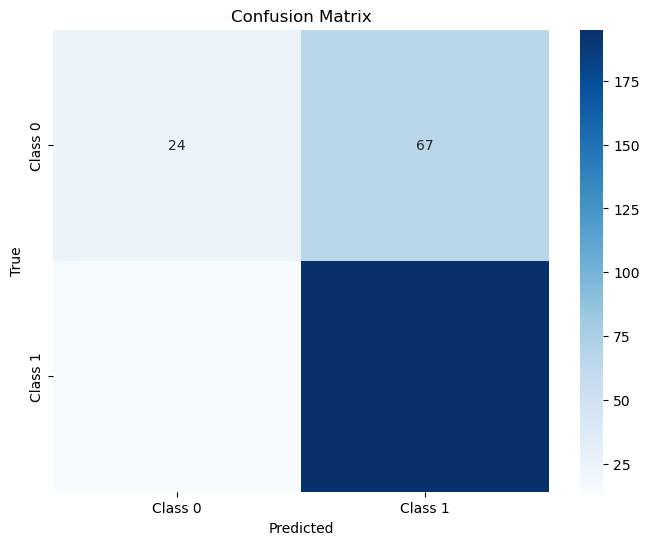

In [39]:
# Compute confusion matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
#size of the figure 
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
#labeling of x axis 
plt.xlabel('Predicted')
#Labeling of y axis 
plt.ylabel('True')
#labeling of title 
plt.title('Confusion Matrix')
# display of the plot 
plt.show()

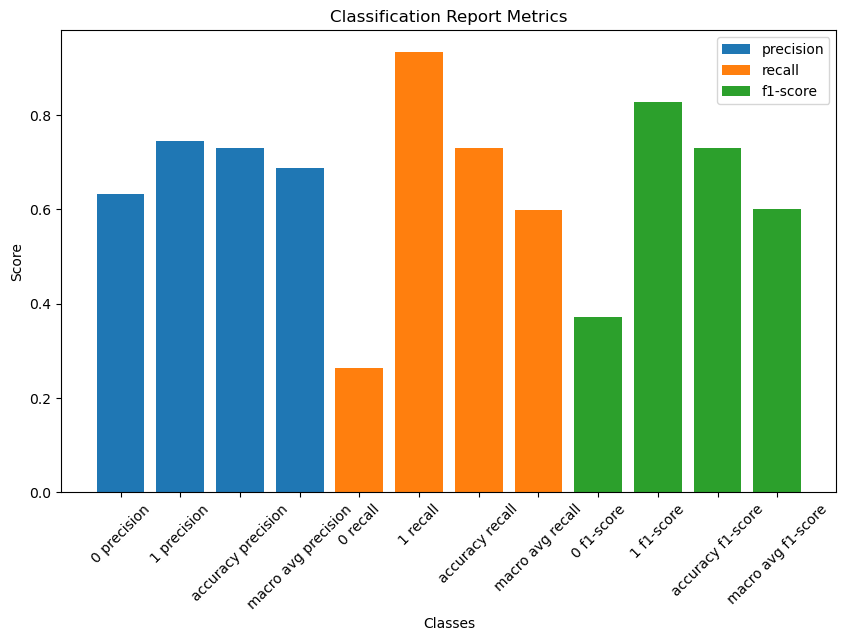

In [30]:
# Generate the classification report as a DataFrame
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
# Plotting the classification report
metrics = ['precision', 'recall', 'f1-score']
classes = report_df.index[:-1]  # Exclude the 'support' row
# Create a bar plot for each metric
plt.figure(figsize=(10, 6))
for i, metric in enumerate(metrics):
    plt.bar(classes + f' {metric}', report_df[metric].iloc[:-1], label=metric)
#labellling of title 
plt.title('Classification Report Metrics')
#labelling of y axis 
plt.ylabel('Score')
#labeling of X axis 
plt.xlabel('Classes')
plt.xticks(rotation=45)
# Display of the legend
plt.legend()
#Display of the plot 
plt.show()